In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../pyCudaPolygon"))
import pyCudaPolygon as pcp
import numpy as np
from matplotlib import pyplot as plt
from pyCudaPolygonLink import libpyCudaPolygon as lpcp

In [2]:
def h(pt1, pt2, startPoint):
    r1 = pt1 - startPoint
    r2 = pt2 - startPoint

    r1 -= np.round(r1)
    r2 -= np.round(r2)

    d = r2 - r1
    return (r1[0] + r2[0]) * d[1]

/tmp/ipykernel_54141/3003763931.py:26: RuntimeWarning: invalid value encountered in divide
  if (np.abs(1-olPY / oa) > 5e-3):


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

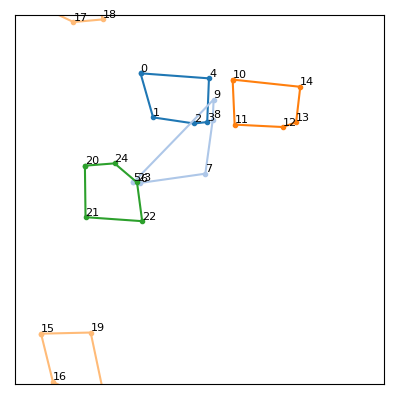

18 0.0010556085630941533 0.001063


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

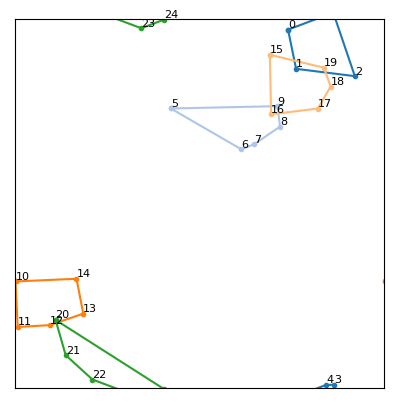

23 0.0017617387343909579 0.001771


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

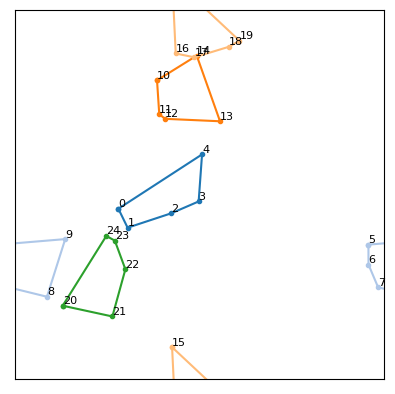

29 1.1864188277460781e-05 1e-05


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

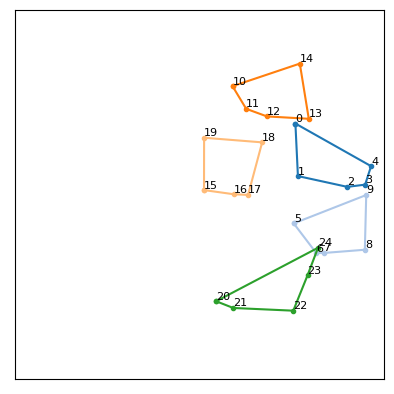

31 6.023383668097524e-05 5.9e-05


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

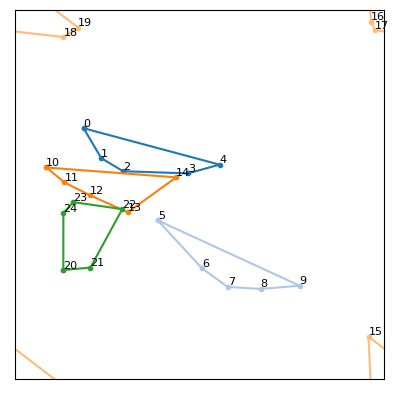

37 5.068584570370408e-06 5e-06


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

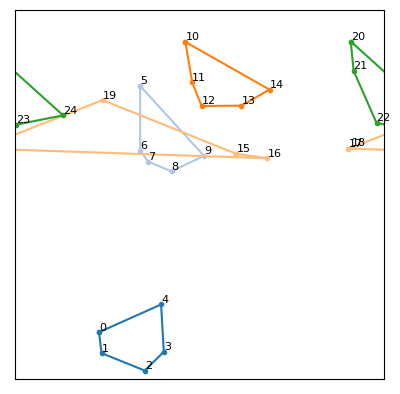

44 0.004502547547355669 0.00159


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

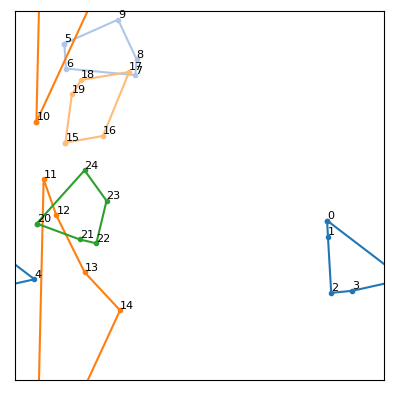

54 0.037026565039386304 0.006312


/tmp/ipykernel_54141/3003763931.py:26: RuntimeWarning: divide by zero encountered in divide
  if (np.abs(1-olPY / oa) > 5e-3):


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

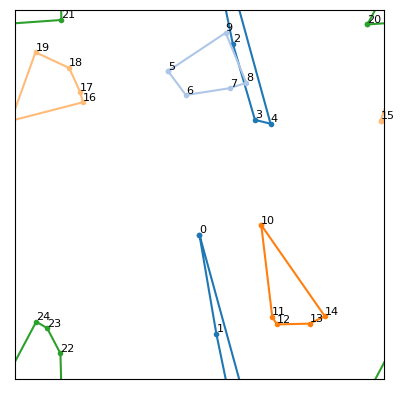

59 0.0001352766770967512 0.0


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

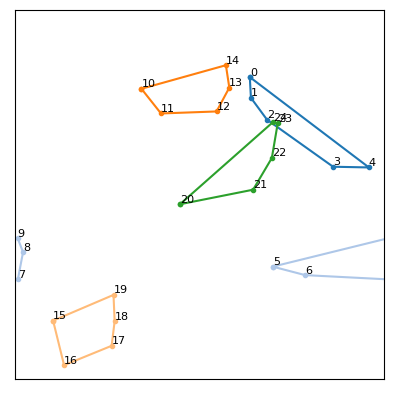

62 9.840695015621856e-05 9.9e-05


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

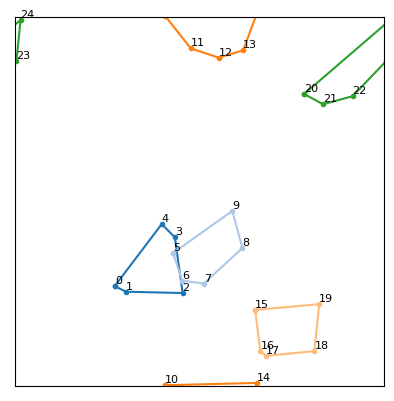

73 0.0003364405419839251 0.00033


<Figure size 640x480 with 0 Axes>

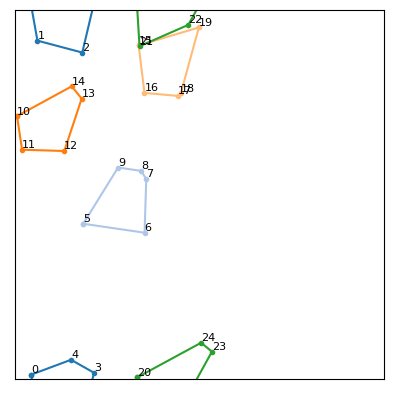

74 3.390398400199236e-05 3.5e-05


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

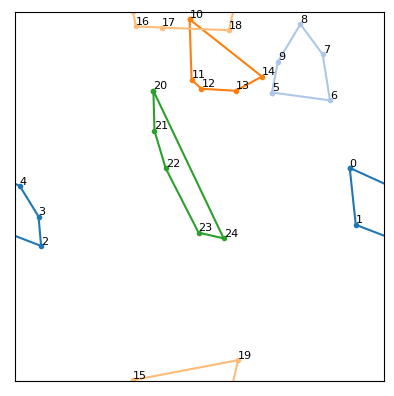

78 0.0004140576153514188 0.000417


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

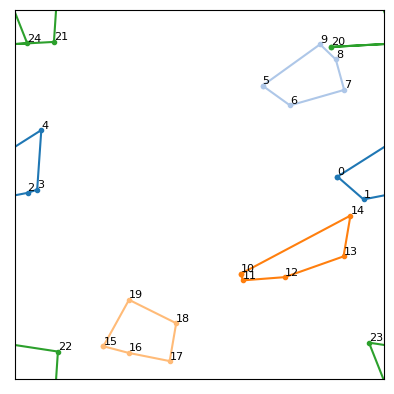

84 0.020000000000000052 0.0


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

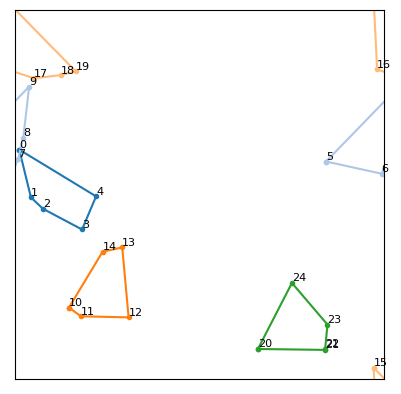

91 7.382986908025913e-06 7e-06


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

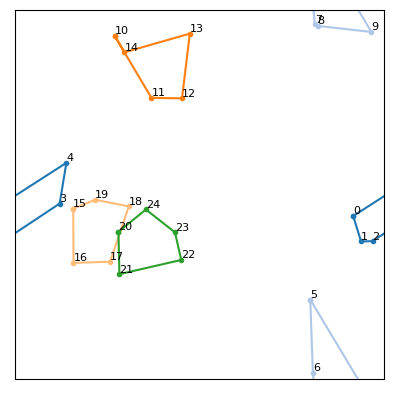

98 4.1630657129272186e-05 4.3e-05


<Figure size 640x480 with 0 Axes>

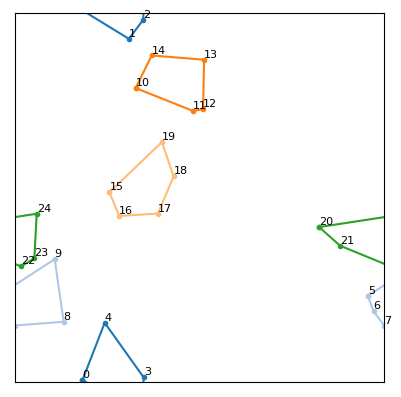

In [4]:
numPolygons = 5
n = 5
nVals = [0, 1, 2, 3, 9,4 ,5, 6, 20, 25, 35, 54]
#for i in nVals:
for i in range(100):
    m = pcp.model(size = n * numPolygons, seed = i)
    m.setModelEnum("normal")
    # Set all polygons to be equally coordinated
    m.setECPolygons(n)
    # Set random polygon vertices positions
    m.setRandomPolygons()
    # Make it so that all of the polygons have the same area
    m.setMonoArea(phi = 0.1)
    plt.clf()
    ax = m.draw(numbering = True)
    # Works fine
    m.setMaxEdgeLength()
    # use default max edge length by finding it within the simulation
    # You can adjust this later.
    m.initializeNeighborCells()
    m.updateNeighborCells()
    m.updateNeighbors(0.1)
    m.updateOverlapArea(1000)
    olPY = m.getOverlapAreaPY(h)
    oa = m.getOverlapArea()
    if (np.abs(1-olPY / oa) > 5e-3):
        plt.show()
        plt.clf()
        print(i, m.getOverlapAreaPY(h), m.getOverlapArea())

In [ ]:
def getFIJTU(pt1, z1, pt2, z2):
    r = (z1 - pt1 + 1.5) % 1 - 0.5
    s = (z2 - pt2 + 1.5) % 1 - 0.5
    g = (pt2 - pt1 + 1.5) % 1 - 0.5
    rSize = np.linalg.norm(r)
    sSize = np.linalg.norm(s)
    denom = r[0] * s[1] - r[1] * s[0]
    return (g[0] * s[1] - g[1] * s[0]) / denom, (g[0] * r[1] - g[1] * r[0]) / denom


In [ ]:
numPolygons = 4
n = 5
nVals = [0, 1, 2, 3, 9,4 ,5, 6, 20, 25, 35, 54]
#for i in nVals:
for i in range(54, 55):
    m = pcp.model(size = n * numPolygons, seed = i)
    m.setModelEnum("normal")
    # Set all polygons to be equally coordinated
    m.setECPolygons(n)
    # Set random polygon vertices positions
    m.setRandomPolygons()
    m.setPositions((m.getPositions() + 0.5) % 1)
    # Make it so that all of the polygons have the same area
    m.setMonoArea(phi = 0.1)
    plt.clf()
    ax = m.draw(numbering = True)
    # Works fine
    m.setMaxEdgeLength()
    # use default max edge length by finding it within the simulation
    # You can adjust this later.
    m.initializeNeighborCells()
    m.updateNeighborCells()
    m.updateNeighbors(0.05)
    m.updateOverlapArea(1000)
    olPY = m.getOverlapAreaPY()
    oa = m.getOverlapArea()
    if (np.abs(1-olPY / oa) > 1e-13):
        plt.show()
        plt.clf()
        print(i, m.getOverlapAreaPY(), m.getOverlapArea())

In [ ]:
print(pts)

In [ ]:
positions = m.getPositions().reshape(m.getNumVertices(), 2)
t, u = getFIJTU(positions[0], positions[1], positions[18], positions[19])
dd = (positions[1] - positions[0] + 1.5) % 1 - 0.5
f018 = t * dd + positions[0]
t, u = getFIJTU(positions[4], positions[0], positions[19], positions[15])
dd = (positions[0] - positions[4] + 1.5) % 1 - 0.5
f419 = t * dd + positions[4]
pts = np.array([positions[0], f018, positions[19], f419, positions[0]])
a = 0
for i in range(len(pts) - 1):
    a += (pts[i + 1][1] - pts[i][1]) * (pts[i + 1][0] + pts[i][0]) / 2
print(a)

In [ ]:
# Works fine
m.setMaxEdgeLength()
# use default max edge length by finding it within the simulation
# You can adjust this later.
m.initializeNeighborCells()
m.updateNeighborCells()
m.updateNeighbors(0.05)
m.updateOverlapArea(10000)
m.getOverlapAreaPY(), m.getOverlapArea()

In [ ]:
# Works fine
m.setMaxEdgeLength()
# use default max edge length by finding it within the simulation
# You can adjust this later.
m.initializeNeighborCells()
m.updateNeighborCells()
m.updateNeighbors(0.05)

In [ ]:
intersections, newTU, starts, ends = m.getIntersections()

In [ ]:
def unpack(val):
    """Unpack a 64-bit integer back into four 16-bit numbers."""
    nums = np.zeros(4)
    nums[3] = val & 0xFFFF
    nums[2] = (val >> 16) & 0xFFFF
    nums[1] = (val >> 32) & 0xFFFF
    nums[0] = (val >> 48) & 0xFFFF
    return nums  

In [ ]:
ij = []
sij = []
for i in range(len(intersections)):
    sisjji = unpack(intersections[i])
    ij.append(sisjji[2:][::-1])
    sij.append(sisjji[0:2])
ij = np.array(ij, dtype = int)
sij = np.array(sij, dtype = int)

In [ ]:
ij,sij

In [ ]:
intersections, _, _, _ = m.getIntersections()
players = m.getPlayers()

In [ ]:
for index in range(players.size):
    firstIntersection = intersections[index]
    secondIntersection = intersections[players[index]]
    j = (firstIntersection >> 16) & 0xFFFF
    i = (firstIntersection) & 0xFFFF
    l = (secondIntersection >> 16) & 0xFFFF
    k = (secondIntersection) & 0xFFFF
    print(i, j, k, l)
    

In [ ]:
# That seems right...I think!
# Next we write the functional. Is there a way to get the behavior we want by repeatedly
# calling a void function that acts as an input?

# Call the function which will affect the relevant arrays (probably need to overload 
# and use enums)

In [ ]:
m.getPlayers()

In [ ]:
(intersections >> 16) & 0xFFFF

In [ ]:
(intersections) & 0xFFFF

In [ ]:
# There seems to be some bug. It may be in my new python function, 
# but it may also be in the implementation of my area calculator. 
# I think it's the latter since it appears to agree when there aren't 
# segments where multiple overlaps occur. Perhaps I got that math wrong?

In [ ]:
np.array([1,2,1,2,1,2,1,2]).reshape(4, 2)